In [1]:
#Importing Essential packages
import tensorflow as tf
from  tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np


In [2]:
# uploading the dataset
df=pd.read_csv('/content/heart.csv')

In [4]:
# Getting the details of the dataset
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [5]:
# Sipliting the target variable
x=df.drop('target',axis=1)
y=df['target']

In [10]:
# Normalizing The data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [16]:
# checking the shape of the transform dataset
X_scaled.shape

(1025, 13)

In [15]:
# sipliting the data into test and training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [29]:
# Setting UP the Hyper-Parameters
input_size=13
batch_size=100
hidden1=64
hidden2=32
hidden3=16
hidden4=1
epochs=100

In [34]:
# Setting The NN layers
model=Sequential()
model.add(Dense(hidden1,input_dim=input_size,activation='relu'))
model.add(Dense(hidden2,activation='relu'))
model.add(Dense(hidden3,activation='relu'))
model.add(Dense(hidden4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# Setting Up the loss function optimizer and metrics
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Getting the summary of the model architecture
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,523 (13.76 KB)

 Trainable params: 3,523 (13.76 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Training the model
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3797 - loss: 0.6957
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5169 - loss: 0.6928 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5228 - loss: 0.6917  
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5227 - loss: 0.6851 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4989 - loss: 0.6680 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5257 - loss: 0.6373 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6417 - loss: 0.5996
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8085 - loss: 0.5531 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8389 - loss: 0.5209 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8442 - loss: 0.5126 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8585 - loss: 0.4909 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8918 - los

In [39]:
# Testing the model on testing data
import sklearn
import numpy as np

from sklearn.metrics import accuracy_score

y_pred_probs=model.predict(x_test,verbose=0)
y_pred=np.where(y_pred_probs>0.5,1,0)

test_accuracy=accuracy_score(y_pred,y_test)
print(f'accuracy on test data is {test_accuracy}')

accuracy on test data is 0.9512195121951219


[[102   0]
 [ 10  93]]


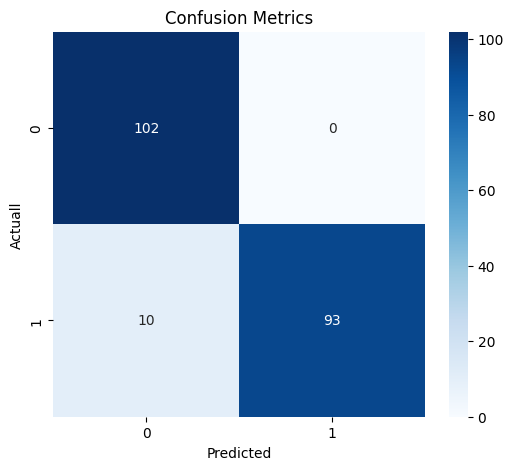

In [44]:
# Checking the Confusion metrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuall')
plt.title('Confusion Metrics')
plt.show()

In [47]:
# Getting the details report of CM and Precision,recall and F1 score
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
precision=precision_score(y_test,y_pred,average='binary')
recall=recall_score(y_test,y_pred,average='binary')
f1=f1_score(y_test,y_pred,average='binary')

print(f"Precision : {precision:.3f}")
print(f'Recall : {recall:.3f}')
print(f'F1 score: {f1:.3f}')
print('\Classification Report:\n',classification_report(y_test,y_pred))

Precision : 1.000
Recall : 0.903
F1 score: 0.949
\Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       102
           1       1.00      0.90      0.95       103

    accuracy                           0.95       205
   macro avg       0.96      0.95      0.95       205
weighted avg       0.96      0.95      0.95       205

